# <span style="color:firebrick"> Esercitazione 2 </span>  

### <span style="color:firebrick"> Esercizio 2.1 </span>  

<font color="red"> - Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

<font color="red">1. sampling a uniform distribution in $[0,1]$
<font color="red">2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

## Importance Sampling

Si consideri l’integrale n-dimensionale  
$$I = \int g(\vec{x})\, p(\vec{x}) \, d\vec{x}$$ 
dove $p(\vec{x})$ è una distribuzione di probabilità normalizzata. In generale, $p(\vec{x})$ non è necessariamente la scelta più efficiente per la stima numerica di $I$. \
Introducendo una distribuzione di probabilità alternativa $d(\vec{x})$, tale che $d(\vec{x}) \geq 0 \ \forall \vec{x}$ e $\int d(\vec{x}) \, d\vec{x} = 1$, l’integrale può essere riscritto come  
$$I = \int \frac{g(\vec{x})\, p(\vec{x})}{d(\vec{x})} \, d(\vec{x}) \, d\vec{x}$$
Utilizzando $d(\vec{x})$ per il campionamento, la varianza della stima Monte Carlo diventa 
$$\text{var}[I]_d = \int \left[ \frac{g(\vec{x})\, p(\vec{x})}{d(\vec{x})} \right]^2 d(\vec{x}) \, d\vec{x} - I^2$$
Il secondo termine, $I^2$, non dipende dalla scelta di $d(\vec{x})$, mentre il primo sì. L’obiettivo dell’IS è quindi scegliere $d(\vec{x})$ in modo da minimizzare la varianza. Si può dimostrare che la varianza è minima quando $d(\vec{x})$ è proporzionale al valore assoluto dell’integranda. In pratica distribuzioni di probabilità che approssimano la forma dell’integranda permettono di stimare con maggiore precisione $I$.

Nel nostro caso, dato l’integrale $I = \int_0^1 \frac{\pi}{2} \cos\!\left( \frac{\pi x}{2} \right) dx = 1$, è stata scelta come distribuzione di probabilità per l’importance sampling $d(x) = -2x + 2$, che è positiva e normalizzata nell’intervallo $[0,1]$. L’integrale può essere riscritto come 
$$I = \int_0^1 \frac{\pi}{2} \frac{\cos(\pi x/2)}{-2x + 2} (-2x + 2) \, dx$$
Per generare numeri casuali distribuiti secondo $d(x)$, si utilizza il metodo dell’inversa della cumulativa. La cumulativa associata è  
$F_x(x) = \int_0^x (-2x' + 2)\, dx' = -x^2 + 2x$. Ponendo $y = F(x)$, con $y \in [0,1)$ estratto uniformemente, si ottiene  
$y = -x^2 + 2x \ \Rightarrow \ x = 1 \pm \sqrt{1 - y}$. Poiché $x \in [0,1]$, si sceglie la soluzione $x = 1 - \sqrt{1 - y}$.

Si riporta l’andamento del valore medio cumulativo $\langle I \rangle$ al variare del numero di blocchi, confrontando il campionamento uniforme con l’importance sampling basato sulla distribuzione $d(x) = -2x + 2$. Come atteso, l’importance sampling mostra una convergenza più rapida e una riduzione significativa dell’errore statistico.


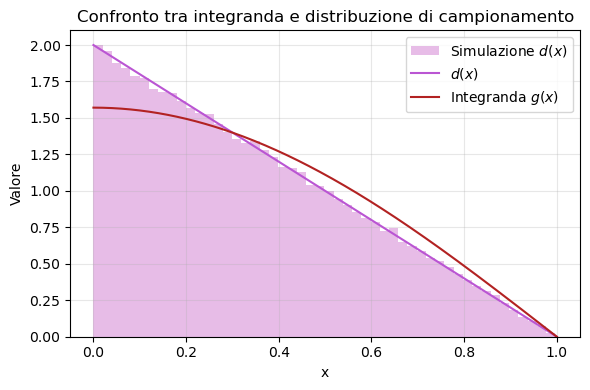

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
data = np.loadtxt("output_test.txt")  
n_throws = data[:, 0]  
random_n = data[:, 1]  

plt.figure(figsize=(6,4))

# Istogramma della distribuzione simulata
plt.hist(random_n, bins=50, density=True, alpha=0.7, color='plum', label="Simulazione $d(x)$")

# Asse x
x = np.linspace(0, 1, 300)

# Distribuzione teorica usata per importance sampling
d = -2*x + 2
plt.plot(x, d, color='mediumorchid', linewidth=1.5, label=r"$d(x)$")

# Integranda (NON normalizzata)
integranda = (np.pi / 2) * np.cos(np.pi * x / 2)
plt.plot(x, integranda, color='firebrick', linewidth=1.5, label=r"Integranda $g(x)$")

# Titoli e legenda
plt.title("Confronto tra integranda e distribuzione di campionamento")
plt.xlabel("x")
plt.ylabel("Valore")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


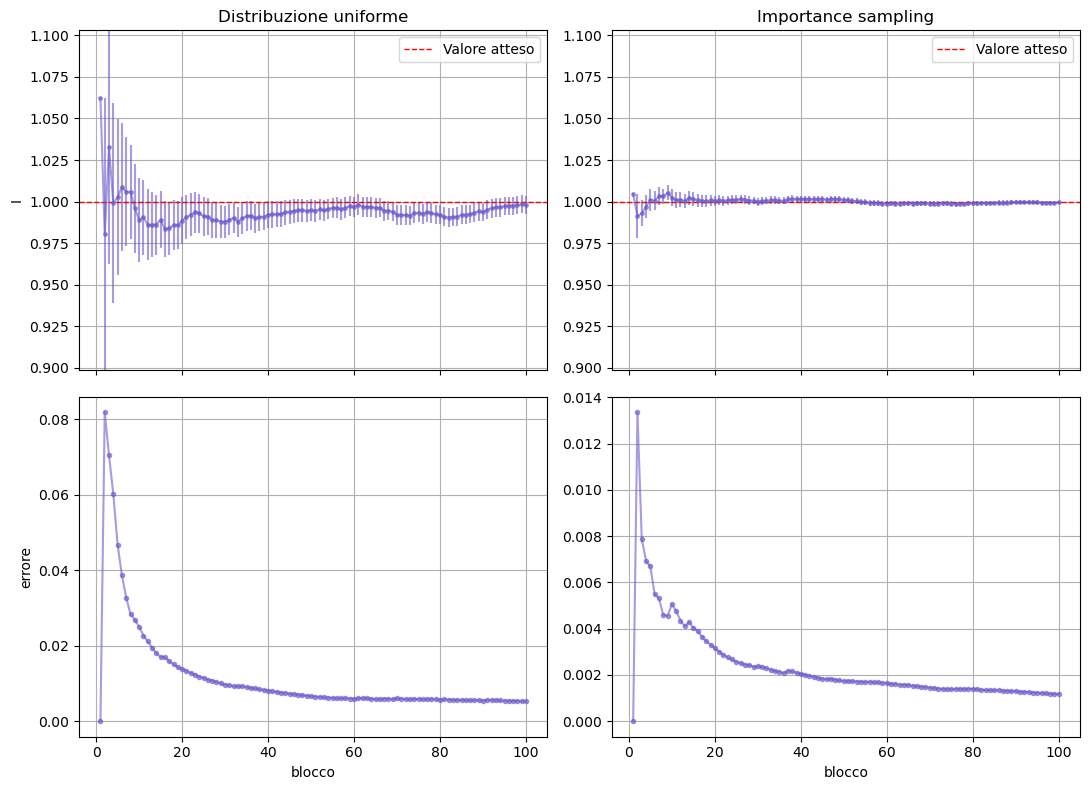

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
data_uniform = np.loadtxt("output.txt")
data_is = np.loadtxt("output_is.txt")

# Estrai colonne
n_throws_u, media_u, err_u = data_uniform[:,0], data_uniform[:,1], data_uniform[:,2]
n_throws_is, media_is, err_is = data_is[:,0], data_is[:,1], data_is[:,2]

# Range comune per l'asse y del valore dell'integrale
y_min = min((media_u - err_u).min(), (media_is - err_is).min())
y_max = max((media_u + err_u).max(), (media_is + err_is).max())

# Figura con 2 righe × 2 colonne
fig, axes = plt.subplots(2, 2, figsize=(11, 8), sharex='col')

# ====== RIGA SUPERIORE: VALORE INTEGRALE ======

# Uniforme
axes[0,0].errorbar(n_throws_u, media_u, yerr=err_u,
                   fmt='.-', alpha=0.6, color='slateblue', markersize=5)
axes[0,0].axhline(y=1, color='red', linestyle='--', linewidth=1, label="Valore atteso")
axes[0,0].set_ylabel("I")
axes[0,0].set_title("Distribuzione uniforme")
axes[0,0].set_ylim(y_min, y_max)
axes[0,0].grid(True)
axes[0,0].legend()

# Importance sampling
axes[0,1].errorbar(n_throws_is, media_is, yerr=err_is,
                   fmt='.-', alpha=0.6, color='slateblue', markersize=5)
axes[0,1].axhline(y=1, color='red', linestyle='--', linewidth=1, label="Valore atteso")
axes[0,1].set_title("Importance sampling")
axes[0,1].set_ylim(y_min, y_max)
axes[0,1].grid(True)
axes[0,1].legend()

# ====== RIGA INFERIORE: ERRORE ======

# Errore uniforme
axes[1,0].plot(n_throws_u, err_u, '.-',alpha=0.6, color='slateblue')
axes[1,0].set_xlabel("blocco")
axes[1,0].set_ylabel("errore")
axes[1,0].grid(True)

# Errore importance sampling
axes[1,1].plot(n_throws_is, err_is, '.-', alpha=0.6, color='slateblue')
axes[1,1].set_xlabel("blocco")
axes[1,1].grid(True)

plt.tight_layout()
plt.show()


### <span style="color:firebrick">Exercise 2.2
<font color="red"> - 3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

<font color="red">1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
<font color="red">2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

<font color="red">Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

<font color="red">Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

## Random Walks

Un **processo stocastico** è una famiglia $\langle X_t \rangle_{t\in I}$ di variabili random. Il processo stocastico è caratterizzato da una funzione di distribuzione a n punti $p_n(x_1,t_1;\dots; x_n, t_n)$ i.e. la probabilità che accada $x_1$ al tempo $t_1$ e via dicendo. Data questa siamo in grado di calcolare quantità interessanti come $\langle X(t_1)\dots X(t_n)\rangle$ e $\text{cov}[X_i(t_1),X_j(t_2)]$. 
$p_n$ soddisfa le proprietà di:
- positività $p_n(x_1,t_1;\dots; x_n, t_n)\geq 0$
- proprietà di marginalizzazione $\int p_n(x_1,t_1;\dots; x_n, t_n) dx_n = p_{n-1}(x_1,t_1;\dots; x_{n-1}, t_{n-1})$
- completezza $\int p_1(x,t)dx=1$
  
Un processo stocatstico è chiamato **stazionario** sse $ p_n(x_1,t_1+\Delta t;\dots; x_n, t_n+\Delta t)=p_n(x_1,t_1;\dots; x_n, t_n) \quad \forall n $.

Un **processo di Markov** è t.c. $\forall n$ e $\forall t_1<t_2 \dots <t_n$ si ha $p_n(x_1,t_1;\dots;x_n,t_n)=\prod_{l=2}^n p_{1|1}(x_l,t_l|x_{l-1},t_{l-1})p_1(x_1,t_1)$, per questo si dice che il processo è _senza memoria_.   

Un **Random Walk** (RW) su un reticolo è la formalizzazione matematica di una traiettoria che consiste nel prendere step successivi casuali. Lo step può avvenire verso un sito vicino secondo una certa probabilità. Noi consideriamo un RW formulato come un processo di Markov, in cui la probabilità di muoversi verso un certo sito vicino dipende soltanto dalla posizione attuale e non dal percorso precedente. Si considera un reticolo 1D infinito con spaziatura $a$ lungo l'asse $x$ e si assume che il tempo tra uno step e l'altro sia $\tau$. Sia $p_1(na,s\tau)$ la probabilità di trovare la particella nel sito che ha coordinata $x=na$ dopo $s$ stap, allora 
$$
p_1(na,(s+1)\tau)=\sum_{m=-\infty}^\infty p_{1|1}(na,(s+1)\tau|ma,s\tau)p_1(ma,s\tau)
$$
dove $p_{1|1}$ è la probabilità di transizione per andare da un sito $x=ma$ a $x=na$ in uno step. Nel caso in cui la probabilità di andare nel $50\%$ dei casi nel sito a destra e nel $50\%$ dei casi nel sito a sinistra:
$$
p_1(na,(s+1)\tau)=\frac{1}{2}p_1((n+1)a,s\tau)+\frac{1}{2}p_1((n-1)a,s\tau)
$$
Dopo alcuni step, chiamando $x=na$ e $t=s\tau$, prendendo $a\to 0$ e $\tau\to 0$, si ottiene l'equazione differenziale per $p_1$, che è un'**equazione di diffusione**
$$
\frac{\partial p_1(x,t)}{\partial t}= D\frac{\partial^2 p_1(x,t)}{\partial x^2}
$$
Risolvendo per $p_1(x,t=0)=\delta(x)$ si trova che $p_1(x,t)$ è una Gaussiana:
$$p_1(x,t)=\frac{1}{\sqrt{4\pi D t}}e^{-\frac{x^2}{4Dt}}$$ 
centrata in $0$ e con varianza $2Dt$. Questo risultato è giustificato dal CLT, infatti la variabile somma introdotta nel CLT non è altro che una realizzazione di un RW 1D su un reticolo. Il cammino medio cresce come la radice della varianza $\sqrt{2Dt}=a\sqrt{N}$

Il più semplice processo stocastico discreto è il **processo di Bernoulli**: si tratta di una sequenza di variabili casuali indipendenti $x_1,x_2,\dots$ t.c. 
- $x_i$ è pari a $0$ o $1$ $\forall i$
- la probabilità che $x_i=1$ è la stessa $\forall i$

### Soluzione esercizio
Il codice realizza una simulazione Monte Carlo di RW 3D, sia su reticolo discreto sia in spazio continuo, con l’obiettivo di studiare l’andamento della distanza quadratica media $\langle r^2(n) \rangle$ in funzione del numero di passi $n$.

La simulazione utilizza un totale di $M = 10^4$ RW, suddivisi in $N = 100$ blocchi contenenti $L = M/N = 100$ RW ciascuno. Ogni RW è composto da $n_{\text{step}} = 100$ passi e parte sempre dall’origine del sistema di riferimento. L’analisi statistica è effettuata tramite il data blocking.

#### Random walk discreto
Nel caso discreto, il random walk evolve su un reticolo cubico tridimensionale. A ogni passo viene scelta:
- una direzione cartesiana $x$, $y$ oppure $z$ con probabilità uniforme $1/3$;
- un verso positivo o negativo lungo la direzione selezionata con probabilità uniforme $1/2$.

Il passo ha lunghezza unitaria e la probabilità di transizione verso ciascuno dei sei siti adiacenti è quindi pari a $1/6$. Dopo ogni passo viene calcolata la distanza quadratica dall’origine, che contribuisce al valore medio di $r^2(n)$.

#### Random walk continuo 
Nel caso continuo, il random walk è realizzato in spazio tridimensionale continuo, con passi di lunghezza unitaria. A ogni passo la direzione è estratta sulla superficie della sfera, generando:
- l’angolo polare $\theta \in [0,\pi]$;
- l’angolo azimutale $\phi \in [0,2\pi)$.

Le componenti del passo sono quindi date da $(\sin\theta \cos\phi,\; \sin\theta \sin\phi,\; \cos\theta)$. Anche in questo caso viene calcolato $r^2(n)$ a ogni passo e successivamente mediato.


Per entrambe le simulazioni vengono salvati su file:
- i valori di $\sqrt{\langle r^2(n) \rangle}$ in funzione del numero di passi;
- le relative incertezze statistiche, ottenute per propagazione dell’errore.


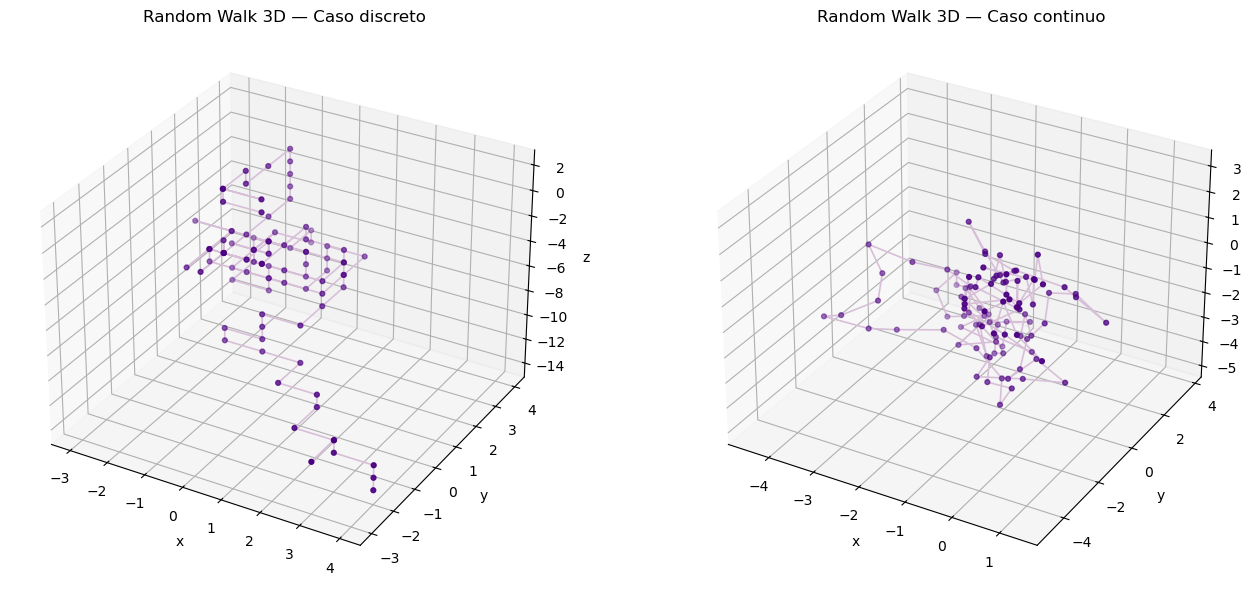

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------- Random Walk DISCRETO -----------
data1 = np.loadtxt("output_disegnoRW.txt")
x1, y1, z1 = data1[:,0], data1[:,1], data1[:,2]

# ----------- Random Walk CONTINUO -----------
data2 = np.loadtxt("output_disegnoRW_c.txt")
x2, y2, z2 = data2[:,0], data2[:,1], data2[:,2]

# Figura unica con due subplot 3D affiancati
fig = plt.figure(figsize=(14,6))

# === PLOT 1 — Caso discreto ===
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(x1, y1, z1, color='indigo', s=12)
ax1.plot(x1, y1, z1, color='thistle', linewidth=1.2)
ax1.set_title("Random Walk 3D — Caso discreto")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

# === PLOT 2 — Caso continuo ===
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x2, y2, z2, color='indigo', s=12)
ax2.plot(x2, y2, z2, color='thistle', linewidth=1.2)
ax2.set_title("Random Walk 3D — Caso continuo")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")

plt.tight_layout()
plt.show()


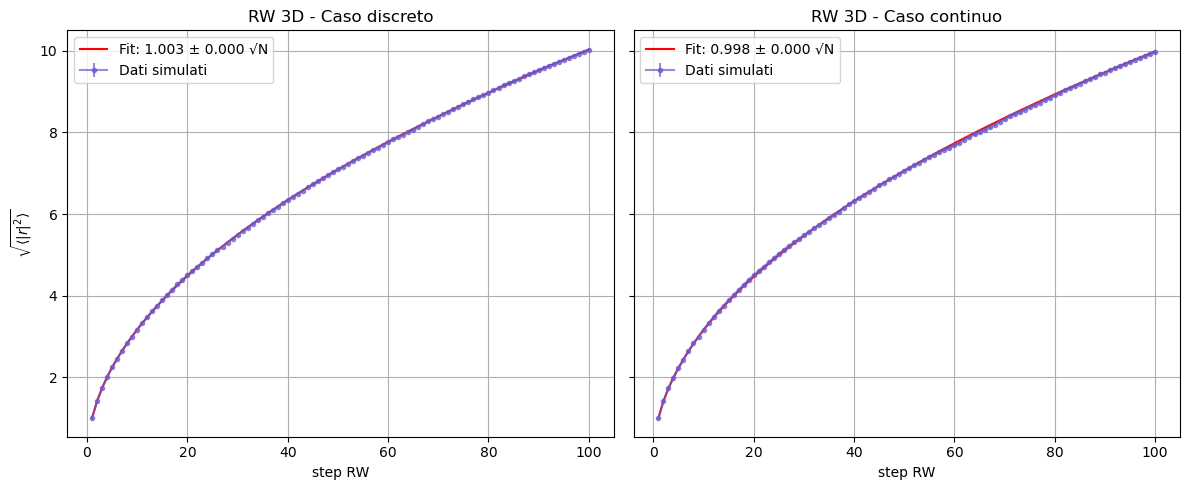



===== RISULTATI FIT =====
RW DISCRETO : r(N) = (1.0029 ± 0.0004) √N
RW CONTINUO : r(N) = (0.9984 ± 0.0004) √N



In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#==========================#
#   Modello per il fit     #
#==========================#
def fit_model(N, a):
    return a*np.sqrt(N)


# ================================
# Caricamento dati RW discreto
# ================================
dataD = np.loadtxt("RW_discreto.txt")
n1, r1, err1 = dataD[:,0], dataD[:,1], dataD[:,2]

# Filtra i valori con errore > 0
maskD = err1 > 0
n1_fit, r1_fit, err1_fit = n1[maskD], r1[maskD], err1[maskD]

poptD, pcovD = curve_fit(fit_model, n1_fit, r1_fit, sigma=err1_fit, absolute_sigma=True)
aD = poptD[0]
errD = np.sqrt(pcovD[0][0])


# ================================
# Caricamento dati RW continuo
# ================================
dataC = np.loadtxt("RW_continuo.txt")
n2, r2, err2 = dataC[:,0], dataC[:,1], dataC[:,2]

# Filtra i valori con errore > 0
maskC = err2 > 0
n2_fit, r2_fit, err2_fit = n2[maskC], r2[maskC], err2[maskC]

poptC, pcovC = curve_fit(fit_model, n2_fit, r2_fit, sigma=err2_fit, absolute_sigma=True)
aC = poptC[0]
errC = np.sqrt(pcovC[0][0])


# ================================
#      PLOT AFFIANCATI
# ================================
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

# ---- Grafico discreto ----
ax[0].errorbar(n1, r1, yerr=err1, fmt='.-', color="slateblue", alpha=0.7, label="Dati simulati")
ax[0].plot(n1, fit_model(n1,**{'a':aD}), 'r-', label=f"Fit: {aD:.3f} ± {errD:.3f} √N")

ax[0].set_title("RW 3D - Caso discreto")
ax[0].set_xlabel("step RW")
ax[0].set_ylabel(r'$\sqrt{\langle |r|^2 \rangle}$')
ax[0].grid(True)
ax[0].legend()


# ---- Grafico continuo ----
ax[1].errorbar(n2, r2, yerr=err2, fmt='.-', color="slateblue", alpha=0.7, label="Dati simulati")
ax[1].plot(n2, fit_model(n2,**{'a':aC}), 'r-', label=f"Fit: {aC:.3f} ± {errC:.3f} √N")

ax[1].set_title("RW 3D - Caso continuo")
ax[1].set_xlabel("step RW")
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()


# ================================
#   Stampa valori fit in console
# ================================
print("\n\n===== RISULTATI FIT =====")
print(f"RW DISCRETO : r(N) = ({aD:.4f} ± {errD:.4f}) √N")
print(f"RW CONTINUO : r(N) = ({aC:.4f} ± {errC:.4f}) √N")
print("==========================\n")


Lo step utilizzato nel codice è pari a $1$, di conseguenza dai risultati del fit si osserva che il random walk segue la legge scalare tipica di un processo diffusivo standard, secondo cui il cammino medio cresce come $a\sqrt{N}=\sqrt{N}$